# lab-customer-analysis-round-4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the `files_for_lab` folder.


**Use the jupyter file from the last lab (Customer Analysis Round 3)**

### 1. Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
**Hint**: You can use np.number and np.object to select the numerical data types and categorical data types respectively


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore') 

mca = pd.read_csv('/Users/spicasumampouw/IronSpica/lab/lab-customer-analysis-round-4/files_for_lab/csv_files/marketing_customer_analysis.csv')

In [27]:
#mca.dtypes
#np.number()
#mca._get_numeric_data()
df_numeric = mca.select_dtypes(include=[int, float])
df_categoric = mca.select_dtypes(include=[object])

### 2. Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 


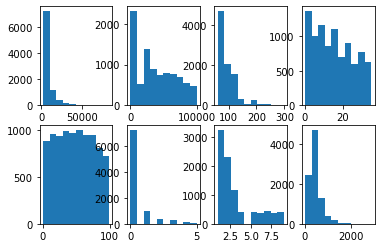

In [28]:
#df_numeric.dtypes
#plt.hist(df_numeric[ 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount'])
#df_numeric['Customer Lifetime Value'].hist()

fig, axs = plt.subplots(2, 4)

axs[0, 0].hist(df_numeric['Customer Lifetime Value'])
axs[0, 1].hist(df_numeric['Income'])
axs[0, 2].hist(df_numeric['Monthly Premium Auto'])
axs[0, 3].hist(df_numeric['Months Since Last Claim'])
axs[1, 0].hist(df_numeric['Months Since Policy Inception'])
axs[1, 1].hist(df_numeric['Number of Open Complaints'])
axs[1, 2].hist(df_numeric['Number of Policies'])
axs[1, 3].hist(df_numeric['Total Claim Amount'])

plt.show()

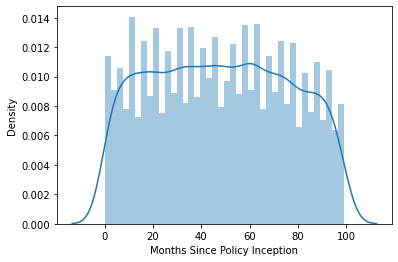

In [48]:
#x = np.random.randn(df_numeric)
#sns.distplot(df_numeric['Customer Lifetime Value'], bins=40)
#sns.distplot(df_numeric['Income'], bins=40)
#sns.distplot(df_numeric['Monthly Premium Auto'], bins=40)
#sns.distplot(df_numeric['Months Since Last Claim'], bins=40)
sns.distplot(df_numeric['Months Since Policy Inception'], bins=40)
#sns.distplot(df_numeric['Number of Open Complaints'], bins=40)
#sns.distplot(df_numeric['Number of Policies'], bins=40)
#sns.distplot(df_numeric['Total Claim Amount'], bins=40)
plt.show()

### 3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 


In [31]:
X = df_numeric.drop(['Total Claim Amount'], axis=1)
y = df_numeric['Total Claim Amount']

# with 'add_constant' we force the model to have an intercept
X = sm.add_constant(X)

model = sm.OLS(y,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1405.
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        22:25:11   Log-Likelihood:                -61425.
No. Observations:                9134   AIC:                         1.229e+05
Df Residuals:                    9126   BIC:                         1.229e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### 4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

<AxesSubplot:xlabel='Months Since Policy Inception', ylabel='Monthly Premium Auto'>

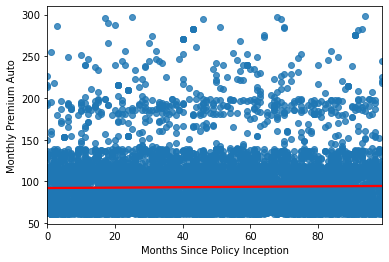

In [51]:
sns.regplot(X['Months Since Policy Inception'], y, line_kws={"color": "red"})

In [39]:
X = df_numeric.drop(['Monthly Premium Auto'], axis=1)
y = df_numeric['Monthly Premium Auto'] 

lm = LinearRegression()
model = lm.fit(X,y) 

predictions = lm.predict(X)

rmse = mean_squared_error(y, predictions, squared=False

print("R2_score:", round(lm.score(X,y),2))
print("RMSE:", rmse)


R2_score: 0.5
RMSE: 24.20743033356893


<AxesSubplot:xlabel='Monthly Premium Auto'>

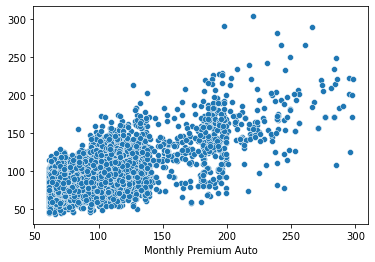

In [40]:
sns.scatterplot(y,predictions)